In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Original Data')

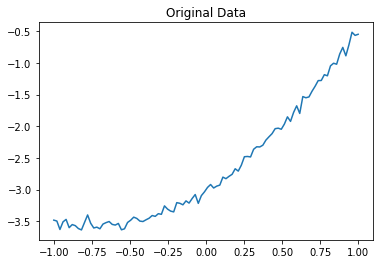

In [2]:
x_data = np.linspace(-1,1,100)[:, np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape)
y_data = np.square(x_data) + 1.5*x_data- 3+ noise # 真实函数
plt.plot(x_data, y_data)
plt.title('Original Data')


In [3]:
#添加占位符
xs = tf.placeholder(tf.float32, [None, 1])
ys = tf.placeholder(tf.float32, [None, 1])

In [4]:
#添加层
w1 = tf.Variable(tf.random_normal([1, 10]))
b1 = tf.Variable(tf.zeros([1, 10]) + 0.1)
ip1 = tf.matmul(xs, w1) + b1
out1 = tf.nn.relu(ip1)

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
#添加层
w2 = tf.Variable(tf.random_normal([10,1]))
b2 = tf.Variable(tf.zeros([1, 1]) + 0.1)
ip2 = tf.matmul(out1, w2) + b2
out2 = ip2

In [6]:
#设定损失函数
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys-out2), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)


Instructions for updating:
Use tf.cast instead.


In [7]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [8]:
for i in range(1000):
    _, loss_value = sess.run([train_step, loss], feed_dict={xs:x_data, ys:y_data})
    if i%50==0:
        print(loss_value)

10.926336
0.023048844
0.01789654
0.015410845
0.013293433
0.010648605
0.007720195
0.005927452
0.0051995637
0.0047878367
0.004623021
0.004539209
0.0044821133
0.004425352
0.004377927
0.0043345448
0.004294357
0.0042571113
0.0042226384
0.0041907853


In [9]:
pred = sess.run(out2, feed_dict={xs:x_data})

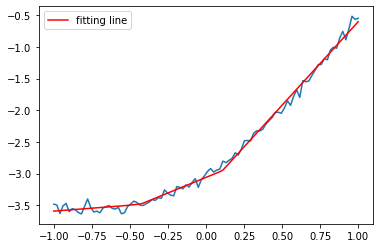

In [10]:
#拟合与原始数据对比
plt.plot(x_data, y_data)
plt.plot(x_data, pred,'r',label='fitting line')
plt.legend()
plt.show()

In [11]:
x_test = np.array([[-2.5],[-2],[-1],[-0.5],[0],[0.5],[1],[2],[2.5]])
y_true = np.square(x_test) + 1.5*x_test- 3 ;
y_sim = sess.run(out2, feed_dict={xs:x_test})

print(x_test)
#print(y_true)
#print(y_sim)

[[-2.5]
 [-2. ]
 [-1. ]
 [-0.5]
 [ 0. ]
 [ 0.5]
 [ 1. ]
 [ 2. ]
 [ 2.5]]


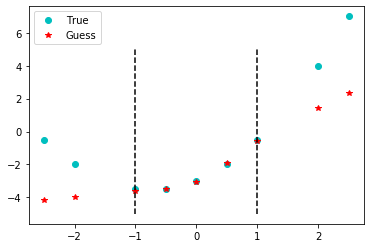

In [12]:
plt.plot(x_test,y_true,'co',label ='True')
plt.plot(x_test,y_sim,'r*',label='Guess')
plt.plot((-1,-1),(-5,5),'k--')
plt.plot((1,1),(-5,5),'k--')
plt.legend()

In [13]:
# 结论： 
# 【1】： 基于神经网络的曲线拟合对源数据范围内的估计比较准确，对范围外的估计很不准确。